In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
from sklearn import metrics
from scipy import stats
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/EIA-UBA/Bimestre2/DL/Clase8/class_7_wine_dataset_v2 (3).csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [5]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

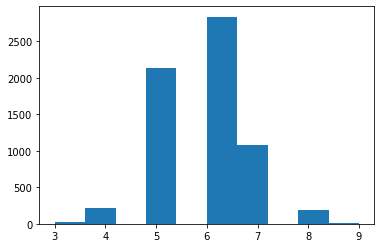

In [6]:
quality = dataset.quality.to_numpy()
fig, ax1 = plt.subplots(1, 1)
ax1.hist(quality)

In [7]:
dataset["quality_label"] = dataset.quality.apply(lambda label: 0 if label <= 6 else 1)
print(len(dataset[dataset["quality_label"]==0]))
print(len(dataset[dataset["quality_label"]==1]))

5220
1277


# Limpieza del dataset

In [8]:
nans = dataset[dataset.isna().sum(axis=1)>=1]
print(nans.shape)

(34, 16)


In [9]:
ds = dataset[dataset.isna().sum(axis=1)==0]
print(ds.shape)

(6463, 16)


# Ingeniería de features

In [10]:
type_dummies = pd.get_dummies(ds["type"], prefix="type")
type_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_red    6463 non-null   uint8
 1   type_white  6463 non-null   uint8
dtypes: uint8(2)
memory usage: 63.1 KB


In [11]:
ds = pd.concat([ds, type_dummies], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

In [13]:
# Analysis del vendor id
print(len(ds["vendor_id"].unique()))

500


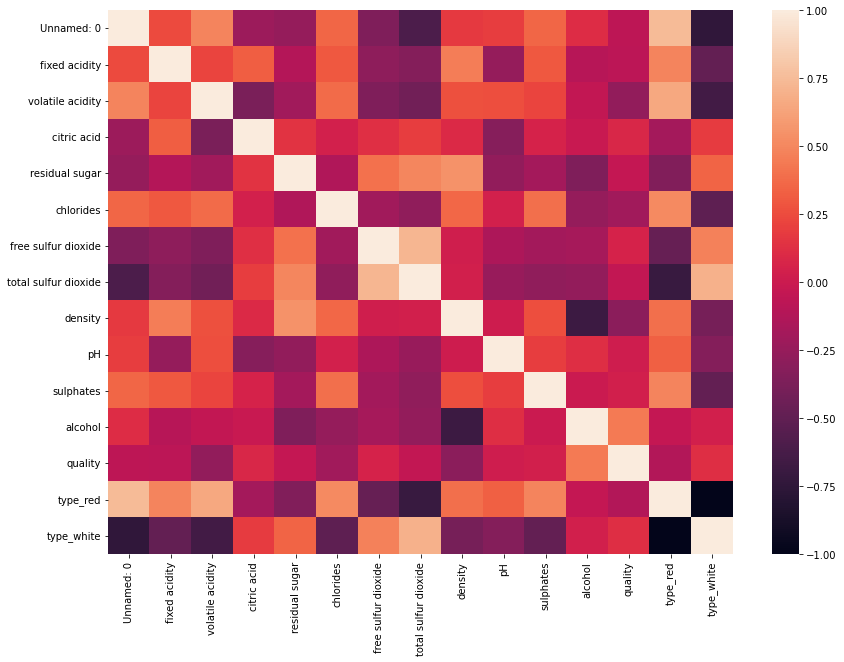

In [14]:
# Analisis de las variables reales
corr = ds.loc[:, (ds.columns != "vendor_id") & (ds.columns != "type") & (ds.columns != "quality_label")].corr()
fig, ax1 = plt.subplots(1, figsize=(14,10))
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f2f0a8bc910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f0a8c9910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f0a8d0950>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f0a8d0410>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2f0a8bce50>,
  <matplotlib.lines.Line2D at 0x7f2f0a8d7a90>]}

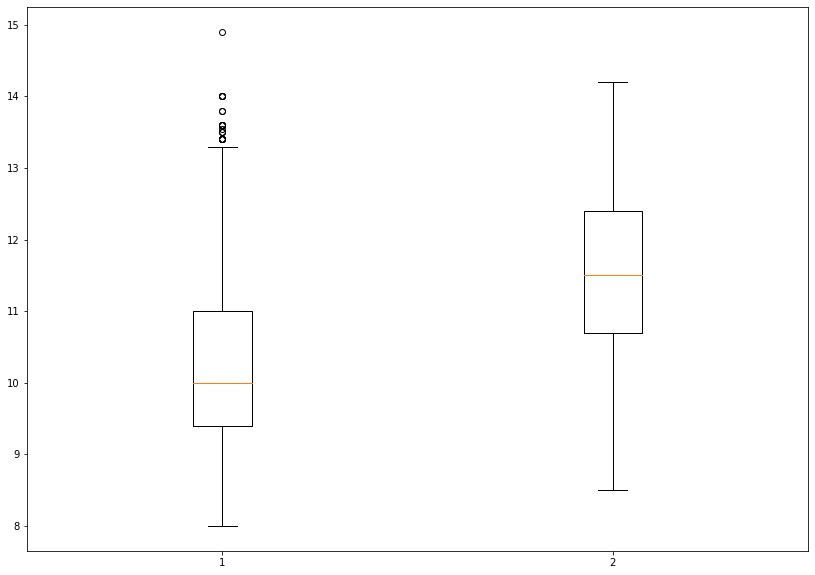

In [15]:
fig, ax1 = plt.subplots(1, figsize=(14,10))
ax1.boxplot([ds.loc[ds["quality_label"] == 0, "alcohol"], 
            ds.loc[ds["quality_label"] == 1, "alcohol"]])

In [16]:
vendor_id = ds["vendor_id"]
quality_label = ds["quality_label"]
final_ds = ds.drop(["Unnamed: 0", "type", "quality_label", "quality", "vendor_id"], axis=1, inplace=False)
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_red              6463 non-null   uint8  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 618.5 KB


# Normalización de los datos

In [17]:
nds = (final_ds - np.min(final_ds, axis=0))/(np.max(final_ds, axis=0) - np.min(final_ds, axis=0))
print(np.min(nds, axis=0))
print(np.max(nds, axis=0))

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
type_red                0.0
type_white              0.0
dtype: float64
fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
type_red                1.0
type_white              1.0
dtype: float64


In [18]:
nds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.0,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.0,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.0,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.0,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.0,1.0


# Split

In [19]:
nds = nds.to_numpy()
quality_label = quality_label.to_numpy()
n = nds.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.85*n)]
val_idx = idx[int(0.85*n):]

X_train = nds[train_idx, :]
y_train = quality_label[train_idx]

X_val = nds[val_idx, :]
y_val = quality_label[val_idx]

In [20]:
print(format(X_train.shape))
print(format(y_train.shape))
print(format(X_val.shape))
print(format(y_val.shape))

(5493, 13)
(5493,)
(970, 13)
(970,)


# NNet sin embeddings

In [21]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    super().__init__()
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


In [22]:
train = CustomDataset(X_train, y_train)
val = CustomDataset(X_val, y_val)

In [23]:
print(train[0][0].shape) #Tamaño Registro
print(train[0][1].shape) #Tamaño Label

(13,)
()


In [24]:
train_dataloader = DataLoader(train, batch_size=1024, shuffle=True)
val_dataloader = DataLoader(val, batch_size=1024, shuffle=True)

In [25]:
print(iter(train_dataloader))

In [26]:
class NNet(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  def forward(self, x):
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    return x

In [27]:
nnet = NNet()
print(nnet)

NNet(
  (linear_1): Linear(in_features=13, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=1, bias=True)
)


In [28]:
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.005)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [29]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

nnet.to(device)

auc_train_list = []
auc_val_list = []
for epoch in range(500):

    running_loss = 0
    running_y_score = []
    running_y_truth = []

    #### TRAINING ####

    nnet.train()

    for i, data in enumerate(train_dataloader):

        # data del batch
        X, y = data
        X = X.to(device).float()
        y = y.to(device).float().reshape(-1,1)

        # forward
        optimizer.zero_grad()
        y_hat = nnet(X)
        y_score = torch.sigmoid(y_hat)

        # backward
        loss = loss_function(y_hat, y)
        loss.backward()
        optimizer.step()

        # metrics
        running_loss += loss.item() 
        running_y_score += list(y_score.detach().cpu().numpy())
        running_y_truth += list(y.detach().cpu().numpy())

    fpr, tpr, thresholds = metrics.roc_curve(running_y_truth, running_y_score)
    auc_value = metrics.auc(fpr, tpr)
    auc_train_list.append(auc_value)
    # print("Loss en epoch {} = {} | AUC = {}".format(epoch, running_loss, auc_value))

    #### VALIDATION ####

    nnet.eval()
    with torch.no_grad():

        for i, data in enumerate(val_dataloader):

            # data del batch
            X, y = data
            X = X.to(device).float()
            y = y.to(device).float().reshape(-1,1)

            # forward
            optimizer.zero_grad()
            y_hat = nnet(X)
            y_score = torch.sigmoid(y_hat)

            # metrics
            running_loss += loss.item() 
            running_y_score += list(y_score.detach().cpu().numpy())
            running_y_truth += list(y.detach().cpu().numpy())

        fpr, tpr, thresholds = metrics.roc_curve(running_y_truth, running_y_score)
        auc_value = metrics.auc(fpr, tpr)
        auc_val_list.append(auc_value)
        print("Val loss en epoch {} = {} | AUC = {}".format(epoch, running_loss, auc_value))


Val loss en epoch 0 = 3262.385223388672 | AUC = 0.505768421792772
Val loss en epoch 1 = 2942.837432861328 | AUC = 0.589097688873156
Val loss en epoch 2 = 2801.681121826172 | AUC = 0.7217135785975882
Val loss en epoch 3 = 2663.015167236328 | AUC = 0.7458056727107854
Val loss en epoch 4 = 2559.9718322753906 | AUC = 0.7679806674675922
Val loss en epoch 5 = 2477.3506774902344 | AUC = 0.7807024575725652
Val loss en epoch 6 = 2420.363250732422 | AUC = 0.7874719352777803
Val loss en epoch 7 = 2408.9049682617188 | AUC = 0.793884845534921
Val loss en epoch 8 = 2368.7518005371094 | AUC = 0.8017770636663074
Val loss en epoch 9 = 2352.6591796875 | AUC = 0.8055211734084636
Val loss en epoch 10 = 2328.9154052734375 | AUC = 0.8075929924267681
Val loss en epoch 11 = 2351.8095092773438 | AUC = 0.8097205771998075
Val loss en epoch 12 = 2314.7758178710938 | AUC = 0.8095110010074205
Val loss en epoch 13 = 2342.5193786621094 | AUC = 0.8070548074323629
Val loss en epoch 14 = 2298.7044067382812 | AUC = 0.812

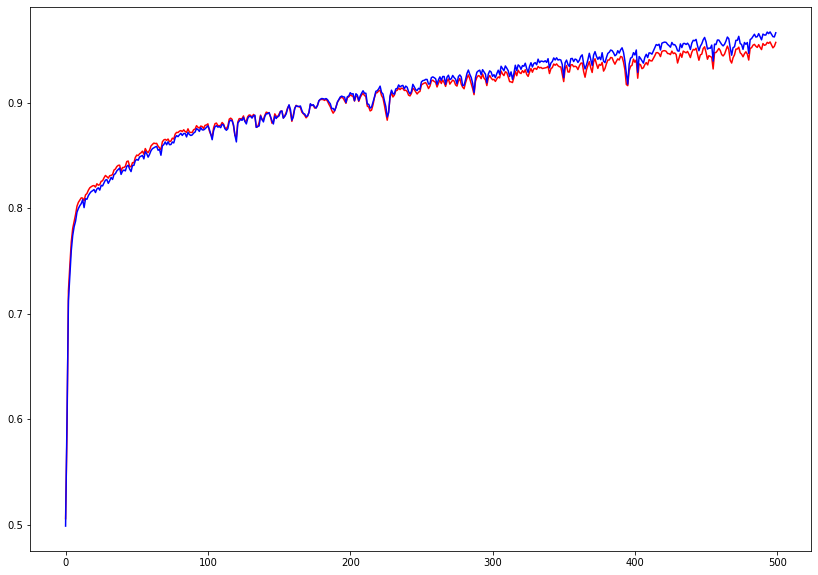

In [30]:
fig, ax1 = plt.subplots(1, figsize=(14, 10))
x = range(0, len(auc_val_list))
ax1.plot(x, auc_val_list, color="r")
ax1.plot(x, auc_train_list, color="b")

# NNet con embeddings

In [36]:
# Transforma id de base de datos a index entre 0 y 499
unique = np.unique(vendor_id)
index = np.arange(0, len(unique))
print(len(vendor_id))
print(len(unique))
print(unique)
vendor_id_to_index = {key: value for key, value in zip(unique, index)}
print(vendor_id_to_index)

6463
500
[  1   2   3   4  18  22  23  25  32  37  40  43  50  56  57  62  65  71
  72  74  78  80  84  87  91  94  97 100 101 103 104 105 106 107 108 109
 110 111 114 115 116 118 119 120 122 124 125 126 128 129 130 131 132 133
 134 137 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 166 167 168 169 170 171 172 173
 174 176 177 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 3

In [39]:
# Transformamos los vendors_id originales a index
vendors_index = [vendor_id_to_index[vendor] for vendor in vendor_id.to_list()]
print(len(vendors_index))
vendors_index = np.array(vendors_index)

6463


In [40]:
class CustomDatasetWithEmb(Dataset):

  def __init__(self, X, vendors_idx, y):
    super().__init__()
    self.X = X
    self.vendors_idx = vendors_idx
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.vendors_idx[idx], self.y[idx]


In [52]:
vendors_index_train = vendors_index[train_idx]  
vendors_index_val = vendors_index[val_idx]
train = CustomDatasetWithEmb(X_train, vendors_index_train, y_train)
val = CustomDatasetWithEmb(X_val, vendors_index_val, y_val)

In [53]:
train_dataloader = DataLoader(train, batch_size=1024, shuffle=True)
val_dataloader = DataLoader(val, batch_size=1024, shuffle=True)

In [44]:
class NNetWithEmbeddings(torch.nn.Module):

  def __init__(self, number_of_vendors, embedding_dim):
    super().__init__()
    self.embedding = torch.nn.Embedding(num_embeddings=number_of_vendors, embedding_dim=embedding_dim)
    self.linear_1 = torch.nn.Linear(in_features=(13+embedding_dim), out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  def forward(self, x, vendor_idx):
    # dim x? (BATCH_SIZE, N_FEATURES)
    # dim vendor_idx? (BATCH_SIZE, 1)
    vendor_emb = self.embedding(vendor_idx) # dim vendor_emb? (BATCH_SIZE, embedding_dim)
    final_input = torch.cat([x, vendor_emb], dim=1) # dim final_input? (BATCH_SIZE, embedding_dim+13)
    x = self.linear_1(final_input)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    return x

In [46]:
nnet2 = NNetWithEmbeddings(500, 8)
print(nnet2)

NNetWithEmbeddings(
  (embedding): Embedding(500, 8)
  (linear_1): Linear(in_features=21, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=1, bias=True)
)


In [47]:
optimizer = torch.optim.Adam(nnet2.parameters(), lr=0.005)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [54]:
nnet = nnet2

nnet.to(device)

auc_train_list = []
auc_val_list = []
for epoch in range(500):

    running_loss = 0
    running_y_score = []
    running_y_truth = []

    #### TRAINING ####

    nnet.train()

    for i, data in enumerate(train_dataloader):

        # data del batch
        X, vendors_idx, y = data
        X = X.to(device).float()
        vendors_idx = vendors_idx.to(device).int()
        y = y.to(device).float().reshape(-1,1)

        # forward
        optimizer.zero_grad()
        y_hat = nnet(X, vendors_idx)
        y_score = torch.sigmoid(y_hat)

        # backward
        loss = loss_function(y_hat, y)
        loss.backward()
        optimizer.step()

        # metrics
        running_loss += loss.item() 
        running_y_score += list(y_score.detach().cpu().numpy())
        running_y_truth += list(y.detach().cpu().numpy())

    fpr, tpr, thresholds = metrics.roc_curve(running_y_truth, running_y_score)
    auc_value = metrics.auc(fpr, tpr)
    auc_train_list.append(auc_value)
    # print("Loss en epoch {} = {} | AUC = {}".format(epoch, running_loss, auc_value))

    #### VALIDATION ####

    nnet.eval()
    with torch.no_grad():

        for i, data in enumerate(val_dataloader):

            # data del batch
            X, vendors_idx, y = data
            X = X.to(device).float()
            vendors_idx = vendors_idx.to(device).int()
            y = y.to(device).float().reshape(-1,1)

            # forward
            optimizer.zero_grad()
            y_hat = nnet(X, vendors_idx)
            y_score = torch.sigmoid(y_hat)

            # metrics
            running_loss += loss.item() 
            running_y_score += list(y_score.detach().cpu().numpy())
            running_y_truth += list(y.detach().cpu().numpy())

        fpr, tpr, thresholds = metrics.roc_curve(running_y_truth, running_y_score)
        auc_value = metrics.auc(fpr, tpr)
        auc_val_list.append(auc_value)
        print("Val loss en epoch {} = {} | AUC = {}".format(epoch, running_loss, auc_value))

Val loss en epoch 0 = 2549.775360107422 | AUC = 0.7731597604012224
Val loss en epoch 1 = 2405.985565185547 | AUC = 0.8287099532173811
Val loss en epoch 2 = 2192.799331665039 | AUC = 0.8827368923199646
Val loss en epoch 3 = 1973.2223510742188 | AUC = 0.9161942236376486
Val loss en epoch 4 = 1711.0982360839844 | AUC = 0.9418713229455471
Val loss en epoch 5 = 1491.7486877441406 | AUC = 0.9615226899945325
Val loss en epoch 6 = 1228.867691040039 | AUC = 0.9756831001880276
Val loss en epoch 7 = 976.9282531738281 | AUC = 0.9835942604915388
Val loss en epoch 8 = 696.7900085449219 | AUC = 0.9898368427369348
Val loss en epoch 9 = 455.9009132385254 | AUC = 0.9933187170481972
Val loss en epoch 10 = 299.3986806869507 | AUC = 0.9957574080562118
Val loss en epoch 11 = 251.29197311401367 | AUC = 0.9974472013471065
Val loss en epoch 12 = 181.1267852783203 | AUC = 0.9984556825910226
Val loss en epoch 13 = 150.45376777648926 | AUC = 0.9988090677541798
Val loss en epoch 14 = 118.38520431518555 | AUC = 0.9

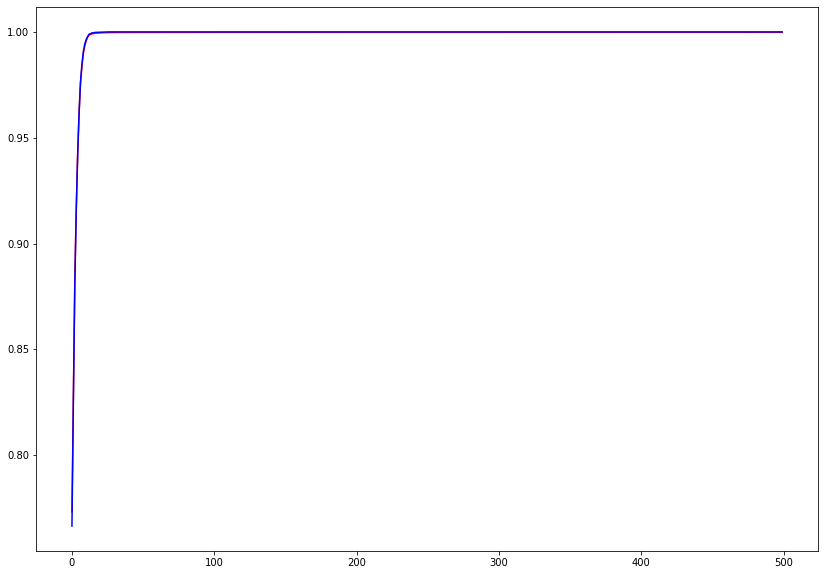

In [55]:
fig, ax1 = plt.subplots(1, figsize=(14, 10))
x = range(0, len(auc_val_list))
ax1.plot(x, auc_val_list, color="r")
ax1.plot(x, auc_train_list, color="b")

In [57]:
torch.save(nnet.state_dict(), "/content/drive/MyDrive/EIA-UBA/Bimestre2/DL/Clase8/model_with_emb.torch")